In [39]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [40]:
sns.set_style('dark')

In [41]:
df_train = pd.read_csv('train.csv')
df_enem = pd.read_csv('test.csv')

In [42]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


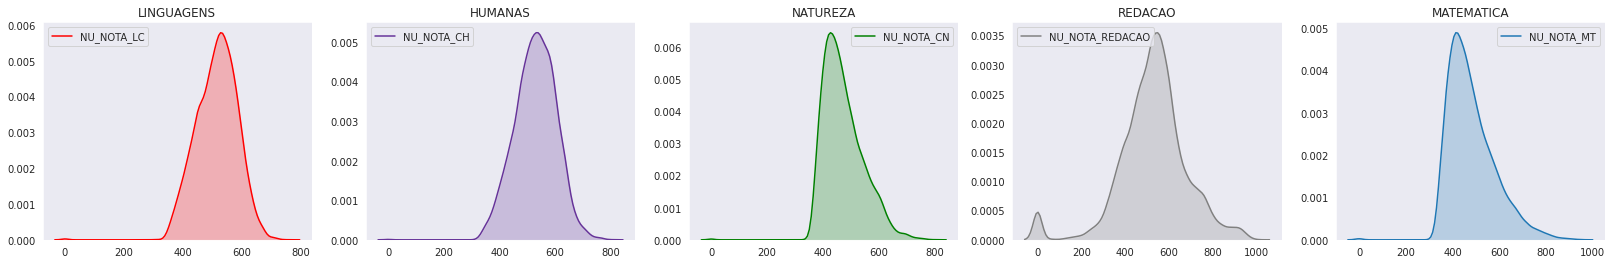

In [43]:
fig, axes = plt.subplots(1, 5, figsize=(28, 4))
sns.kdeplot(df_train['NU_NOTA_LC'], ax = axes[0], shade=True, color='r')
sns.kdeplot(df_train['NU_NOTA_CH'], ax = axes[1], shade=True, color='rebeccapurple')
sns.kdeplot(df_train['NU_NOTA_CN'], ax = axes[2], shade=True, color='g')
sns.kdeplot(df_train['NU_NOTA_REDACAO'], ax = axes[3], shade=True, color='grey')
sns.kdeplot(df_train['NU_NOTA_MT'], ax = axes[4], shade=True)

axes[0].set_title('LINGUAGENS')
axes[1].set_title('HUMANAS')
axes[2].set_title('NATUREZA')
axes[3].set_title('REDACAO')
axes[4].set_title('MATEMATICA')
plt.show()

In [44]:
corr_mt = pd.DataFrame(df_train.corr()['NU_NOTA_MT'].sort_values(ascending=False))

In [45]:
corr_mt.head(5)

,NU_NOTA_MT
NU_NOTA_MT,1.000000
NU_NOTA_CN,0.584941
NU_NOTA_CH,0.529594
NU_NOTA_LC,0.494695
NU_NOTA_REDACAO,0.379376


In [46]:
X = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_DEPENDENCIA_ADM_ESC']]
y = df_train[['NU_NOTA_MT']]

In [47]:
X.isnull().sum()/X.shape[0]

NU_NOTA_CN                0.246832
NU_NOTA_CH                0.246832
NU_NOTA_LC                0.261981
NU_NOTA_REDACAO           0.261981
TP_DEPENDENCIA_ADM_ESC    0.688128
dtype: float64

In [48]:
X.drop(columns='TP_DEPENDENCIA_ADM_ESC', inplace=True)

In [49]:
X['NU_NOTA_LC'].fillna(-1000, inplace=True)
X['NU_NOTA_CH'].fillna(-1000, inplace=True)
X['NU_NOTA_CN'].fillna(-1000, inplace=True)
X['NU_NOTA_REDACAO'].fillna(-1000, inplace=True)
y['NU_NOTA_MT'].fillna(-1000, inplace=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=777)

In [51]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y_pred = reg.predict(X_test)

In [53]:
r2_score(y_test, y_pred)

0.9879143867654372

In [54]:
mean_squared_error(y_test, y_pred)

5284.884425769868

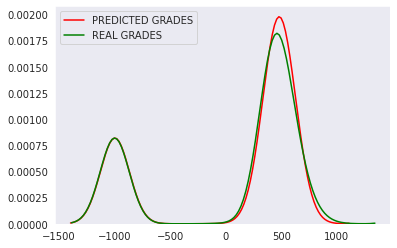

In [55]:
sns.distplot(y_pred, color='r', label='PREDICTED GRADES', hist=False)
sns.distplot(y_test, color='g', label='REAL GRADES', hist=False) 
plt.show()

In [56]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=777)
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=777, verbose=0, warm_start=False)

In [57]:
y_pred = random_forest.predict(X_test)

In [58]:
r2_score(y_test, y_pred)

0.9899934540867896

In [59]:
mean_squared_error(y_test, y_pred)

4375.734820078349

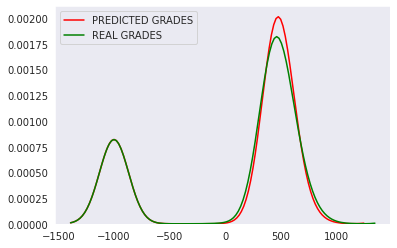

In [60]:
sns.distplot(y_pred, color='r', label='PREDICTED GRADES', hist=False)
sns.distplot(y_test, color='g', label='REAL GRADES', hist=False) 
plt.show()

In [61]:
X_answer = df_enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].fillna(-1000)

In [62]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=777)
random_forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=777, verbose=0, warm_start=False)

In [63]:
Y_answer = random_forest.predict(X_answer)

In [64]:
Y_answer[Y_answer<0] = 0

In [65]:
df_enem['NU_NOTA_MT']=np.around(Y_answer, 2)

In [66]:
df_enem = df_enem[['NU_INSCRICAO','NU_NOTA_MT']]

In [67]:
df_enem

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,409.27
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,445.62
2,b38a03232f43b11c9d0788abaf060f7366053b6d,590.01
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.00
4,715494628a50142ce8cb17191cfe6d0f3cae0934,512.44
5,e656d6bad65c93fb2880f1eba5037008c8e75774,459.25
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,500.32
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,455.08
8,043c544a2104aa8a9849f1a703a08d37a2f16839,464.43
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,483.52


In [69]:
df_enem.to_csv('answer.csv', index=False)